In [1]:
from skimage import io
import numpy as np
from skimage.color import rgb2gray

In [2]:
pic = rgb2gray(io.imread("C:\\Users\\Agrim Nautiyal\\Desktop\\mri tumour\\pic2.jpg"))

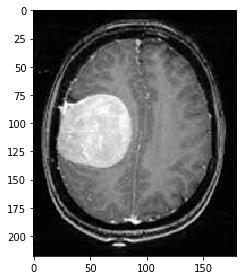

In [3]:
io.imshow(pic)

In [4]:
def lap_sharpen(image):
    kernel = (np.array([[-1, -1, -1],
                    [-1, 200, -1],
                    [-1, -1, -1]]))
    
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[:image.shape[0],:image.shape[1]] = image[:]
    
    for x in range(image.shape[1]):     
        for y in range(image.shape[0]):
            output[y,x]=((kernel*image_padded[y:y+3,x:x+3]).sum())
    
    
    return output
                    
            #for y in range(i_height):
          #for ky in range(-(k_height // 2), k_height - 1):

In [5]:
lap_sharp = lap_sharpen(pic)

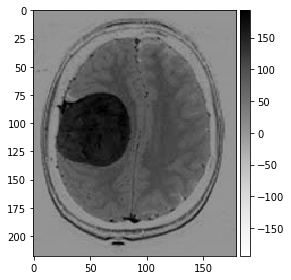

In [6]:
io.imshow(lap_sharp, cmap='Greys')

In [7]:
def sobel_filter(image):
    kernel1 = (np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]]))
    output1 = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[:image.shape[0],:image.shape[1]] = image[:]
    
    for x in range(image.shape[1]):     
        for y in range(image.shape[0]):
            output1[y,x]=((kernel1*image_padded[y:y+3,x:x+3]).sum())
    
    kernel2 = (np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]))
    
    output2 = np.zeros_like(image)
    for x in range(image.shape[1]):     
        for y in range(image.shape[0]):
            output2[y,x]=((kernel2*image_padded[y:y+3,x:x+3]).sum())
    
    result = output1+output2
    
    return result

In [8]:
sobel_result = sobel_filter(pic)

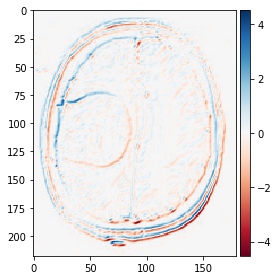

In [9]:
io.imshow(sobel_result)

In [10]:
def average(image):
    members = [(0,0)] * 9
    img = image[:]
    width, height = image.shape[0], image.shape[1]
    for i in range(1,width-1):
        for j in range(1,height-1):
            members[0] = img[i-1,j-1]
            members[1] = img[i-1,j]
            members[2] = img[i-1,j+1]
            members[3] = img[i,j-1]
            members[4] = img[i,j]
            members[5] = img[i,j+1]
            members[6] = img[i+1,j-1]
            members[7] = img[i+1,j]
            members[8] = img[i+1,j+1]
            img[i][j] = (members[0] + members[1]+ members[2] +members[3]+ members[4]+ members[5] +members[6] +members[7]+ members[8])//9
                
    return img;
def median(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            np.sort(temp)
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [11]:
avg_result = median(sobel_result, 5)

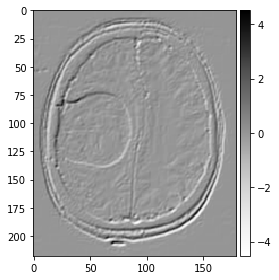

In [12]:
io.imshow(avg_result, cmap='Greys')

In [13]:
mask = avg_result*lap_sharp

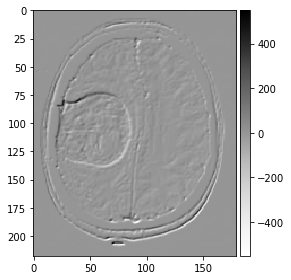

In [14]:
io.imshow(mask, cmap="Greys")

In [15]:
temp_sharp = pic+mask

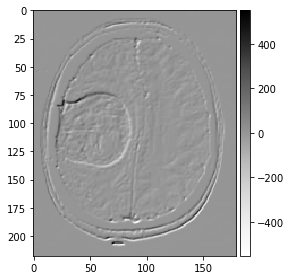

In [16]:
io.imshow(temp_sharp, cmap="Greys")

In [17]:
t_1 = average(temp_sharp)
t_2 = average(temp_sharp)
for i in range(5):
    t_1 = average(t_1)

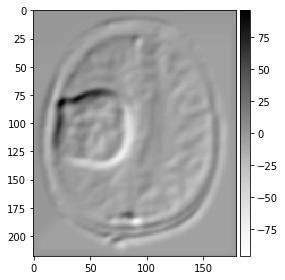

In [18]:
io.imshow(t_1, cmap="Greys")

In [19]:

test_res1 = pic+t_1*lap_sharp

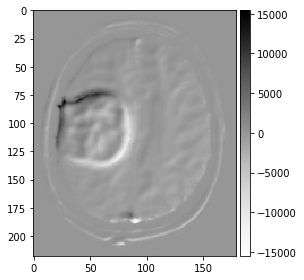

In [20]:
io.imshow(test_res1, cmap='Greys')

In [21]:
test_res2 = -1*test_res1

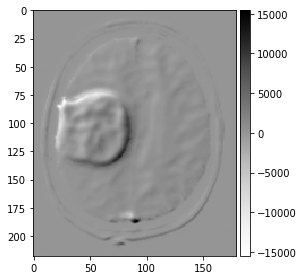

In [22]:
io.imshow(test_res2, cmap="Greys")

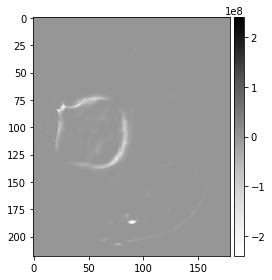

In [23]:
io.imshow(test_res1*test_res2, cmap="Greys")

In [24]:
res = test_res1*test_res2

In [25]:
res

array([[-1.46988662e-03, -1.46988662e-03, -1.46988662e-03, ...,
        -3.86278900e-04, -3.93567020e-04, -5.86540444e-05],
       [-1.46988662e-03, -5.04927336e+00, -5.04927336e+00, ...,
        -2.24412149e+00, -2.31517109e+00, -5.86540444e-05],
       [-1.48188128e-02, -5.04927336e+00, -5.04927336e+00, ...,
        -9.02354479e+00, -2.31517109e+00, -5.86540444e-05],
       ...,
       [-2.65111453e-03, -9.02354479e+00, -9.02354479e+00, ...,
        -4.63515571e+00, -9.28456747e+00, -1.30913716e-04],
       [-2.84031917e-04, -2.31517109e+00, -2.31517109e+00, ...,
        -2.27950788e+00, -2.39946175e+00, -5.96000621e-05],
       [-5.86540444e-05, -5.83883037e-05, -5.83883037e-05, ...,
        -1.48702327e-05, -1.50189773e-05, -6.05536480e-05]])

In [26]:
res.max()

-0.0

In [27]:
res2 = 0-res

In [28]:
res2

array([[1.46988662e-03, 1.46988662e-03, 1.46988662e-03, ...,
        3.86278900e-04, 3.93567020e-04, 5.86540444e-05],
       [1.46988662e-03, 5.04927336e+00, 5.04927336e+00, ...,
        2.24412149e+00, 2.31517109e+00, 5.86540444e-05],
       [1.48188128e-02, 5.04927336e+00, 5.04927336e+00, ...,
        9.02354479e+00, 2.31517109e+00, 5.86540444e-05],
       ...,
       [2.65111453e-03, 9.02354479e+00, 9.02354479e+00, ...,
        4.63515571e+00, 9.28456747e+00, 1.30913716e-04],
       [2.84031917e-04, 2.31517109e+00, 2.31517109e+00, ...,
        2.27950788e+00, 2.39946175e+00, 5.96000621e-05],
       [5.86540444e-05, 5.83883037e-05, 5.83883037e-05, ...,
        1.48702327e-05, 1.50189773e-05, 6.05536480e-05]])

C:\Users\Agrim Nautiyal\Anaconda3\envs\dsenv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


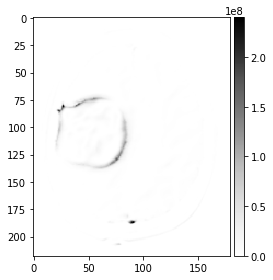

In [29]:
io.imshow(res2, cmap="Greys")

In [30]:
res2_lap = lap_sharpen(res2)

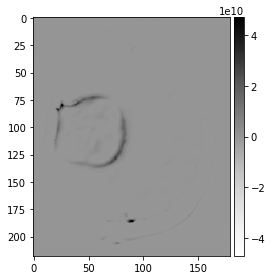

In [31]:
io.imshow(res2_lap, cmap="Greys")

C:\Users\Agrim Nautiyal\Anaconda3\envs\dsenv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


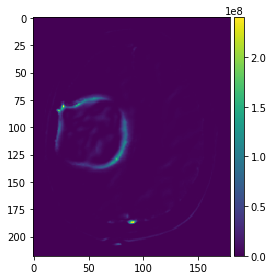

In [32]:
io.imshow(res2)